In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [47]:
# Read the csv file and drop the first row (which contains column names).
df = pd.read_csv("final_dataset.csv",header=None)
df = df.drop([0], axis=0)
print(df)

     0         1         2         3         4         5         6     \
1      IT  0.048594  0.048560  0.048819  0.048955  0.048694  0.048223   
2      IT  0.048594  0.048560  0.048819  0.048955  0.048694  0.048223   
3      IT  0.049449  0.049339  0.049355  0.049419  0.049286  0.048891   
4      IT  0.048371  0.048442  0.048895  0.048948  0.048490  0.048258   
5      IT  0.061935  0.061450  0.061121  0.060912  0.060783  0.060752   
...   ...       ...       ...       ...       ...       ...       ...   
6268   BT  0.190796  0.190046  0.189282  0.188839  0.188398  0.188382   
6269   BT  0.204263  0.203979  0.203816  0.203367  0.202674  0.202419   
6270   BT  0.085567  0.085279  0.085302  0.085475  0.085598  0.085337   
6271   BT  0.082693  0.082596  0.082363  0.082156  0.082064  0.081929   
6272   BT  0.087085  0.086803  0.086579  0.086467  0.086342  0.086148   

          7         8         9     ...      1547      1548      1549  \
1     0.047939  0.047963  0.047947  ...  0.570621 

In [48]:
# Split the data into features (x) and labels (y).
x = df.iloc[:,1:]
print(x)
y = df.iloc[:,0]
print(y)

          1         2         3         4         5         6         7     \
1     0.048594  0.048560  0.048819  0.048955  0.048694  0.048223  0.047939   
2     0.048594  0.048560  0.048819  0.048955  0.048694  0.048223  0.047939   
3     0.049449  0.049339  0.049355  0.049419  0.049286  0.048891  0.048538   
4     0.048371  0.048442  0.048895  0.048948  0.048490  0.048258  0.048453   
5     0.061935  0.061450  0.061121  0.060912  0.060783  0.060752  0.060740   
...        ...       ...       ...       ...       ...       ...       ...   
6268  0.190796  0.190046  0.189282  0.188839  0.188398  0.188382  0.189148   
6269  0.204263  0.203979  0.203816  0.203367  0.202674  0.202419  0.202854   
6270  0.085567  0.085279  0.085302  0.085475  0.085598  0.085337  0.084738   
6271  0.082693  0.082596  0.082363  0.082156  0.082064  0.081929  0.081736   
6272  0.087085  0.086803  0.086579  0.086467  0.086342  0.086148  0.085997   

          8         9         10    ...      1547      1548    

In [49]:
# Create a label map to convert string labels into numeric labels.
data_labels = ['IT', 'GT', 'AT' ,'BT']
for label in data_labels:
 print(label ," : ",sum(y==label))

IT  :  1665
GT  :  1516
AT  :  1416
BT  :  1675


In [50]:
# Map the string labels to numeric labels.
label_map = {'IT': 0, 'GT': 1, 'AT': 2,'BT': 3}
y= y.map(label_map)
print(y)
for label in range(0,4):
 print(label ," : ",sum(y==label))


1       0
2       0
3       0
4       0
5       0
       ..
6268    3
6269    3
6270    3
6271    3
6272    3
Name: 0, Length: 6272, dtype: int64
0  :  1665
1  :  1516
2  :  1416
3  :  1675


In [51]:
# Use SelectKBest function to extract the top 700 features from the dataset based on f_classif score.
selector = SelectKBest(score_func=f_classif, k=700)
X = selector.fit_transform(x, y)

In [52]:
# Split the dataset into training and testing sets (85:15).
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=41,test_size=0.15)
print(y_train.value_counts())
print(y_test.value_counts())


3    1432
0    1419
1    1276
2    1204
Name: 0, dtype: int64
0    246
3    243
1    240
2    212
Name: 0, dtype: int64


In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Initialize a list of machine learning models

model_list =["LogisticRegression","KNeighborsClassifier","RandomForestClassifier","Simple DecisionTreeClassifier","ID3 DecisionTreeClassifier ","svm"]
model_pipeline = []
model_pipeline.append(LogisticRegression(C=300000, solver='newton-cg'))
model_pipeline.append(KNeighborsClassifier(n_neighbors=4,weights="distance",algorithm='brute',leaf_size=30,p=115))
model_pipeline.append(RandomForestClassifier(n_estimators=150,criterion="entropy",max_features='sqrt'))
model_pipeline.append(DecisionTreeClassifier(criterion='gini'))
model_pipeline.append(DecisionTreeClassifier(criterion='entropy'))
model_pipeline.append(SVC(C=200000, gamma=0.1, kernel='rbf', decision_function_shape='ovr'))

In [30]:
# Train each model on the training set and predict on the testing set. Calculate the accuracy score and confusion matrix for each model
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline:
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     acc_list.append(metrics.accuracy_score(y_test,y_pred))
     cm_list.append(metrics.confusion_matrix(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


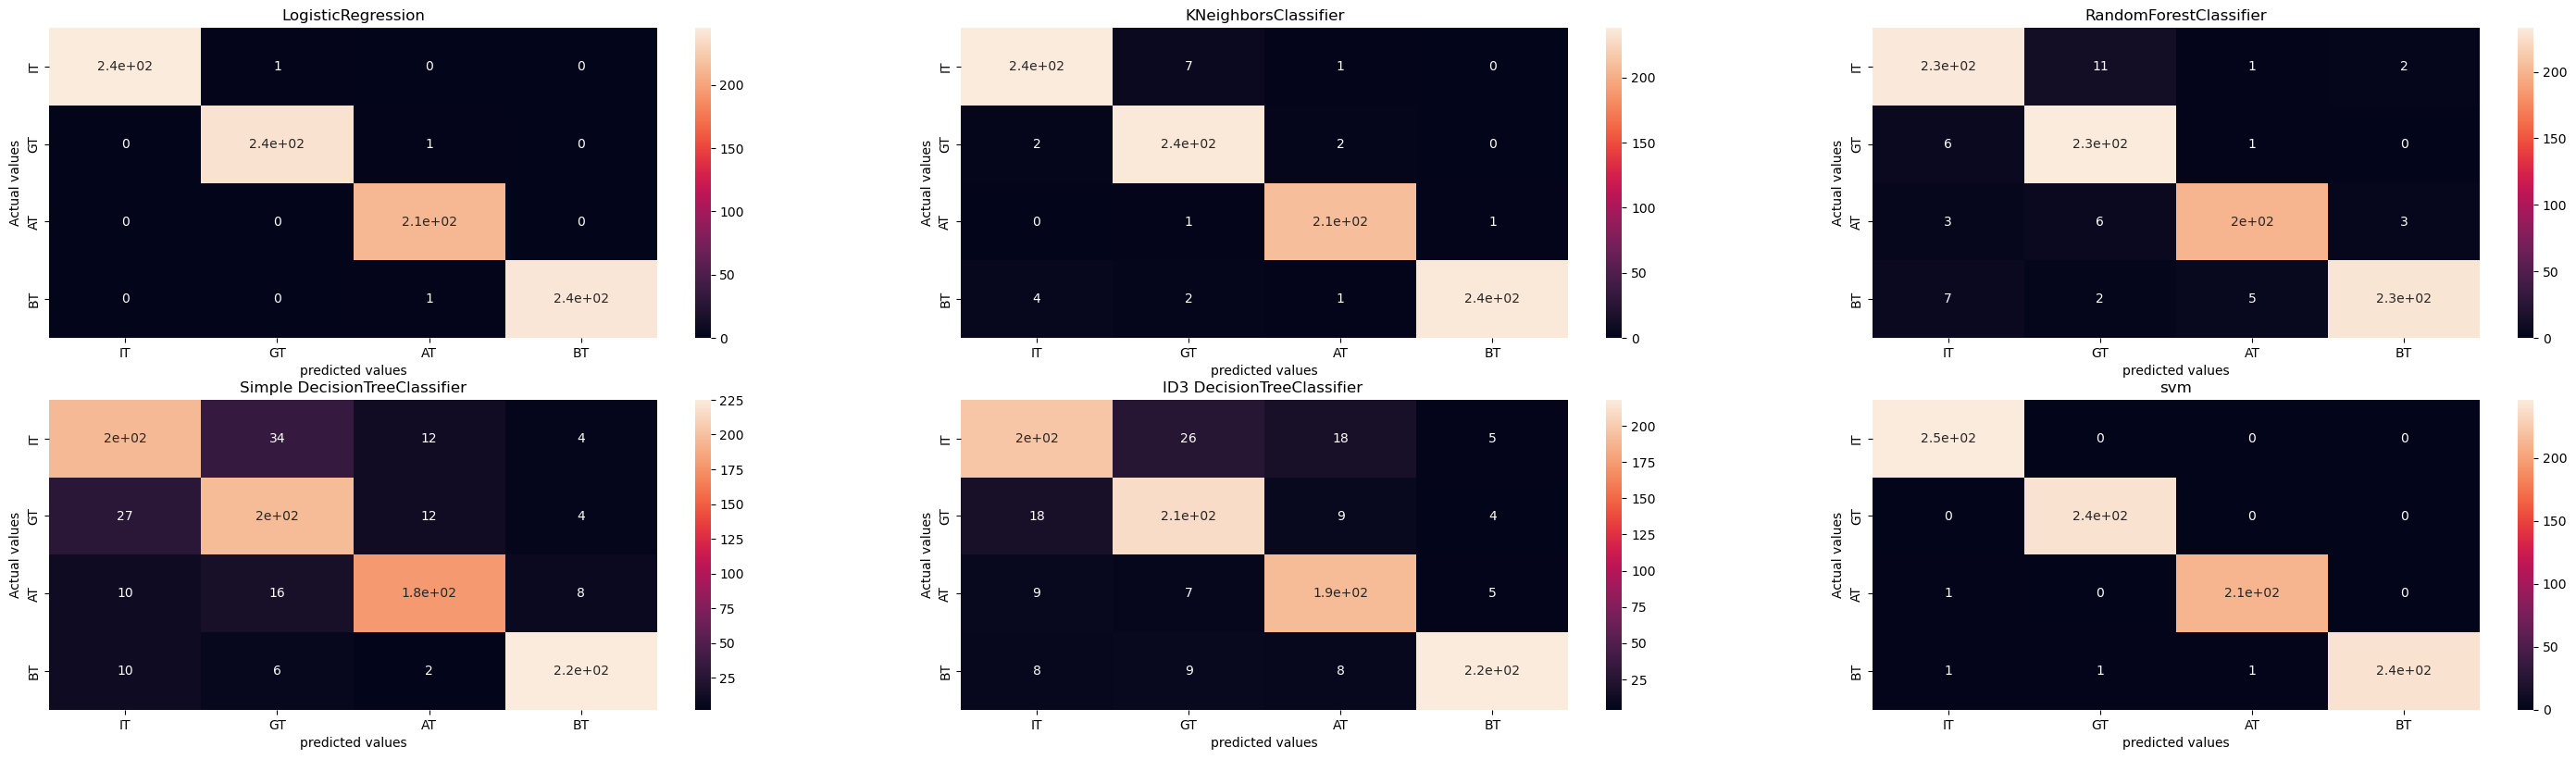

In [33]:
# Visualize the confusion matrix for each model using a heatmap.
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(36,20))
for i in range(len(cm_list)):
     cm = cm_list[i]
     model = model_list[i]
     sub = fig.add_subplot(4,3,i+1).set_title(model)
     cm_plot = sns.heatmap(cm,annot=True)
     cm_plot.set_xlabel("predicted values")
     cm_plot.set_ylabel("Actual values")
     cm_plot.xaxis.set_ticklabels(data_labels)
     cm_plot.yaxis.set_ticklabels(data_labels)

In [34]:
# Store the results in a dataframe and print it out.
result_of_dataframe = pd.DataFrame({'Model':model_list,'ACCURACY':acc_list})
print(result_of_dataframe)

                           Model  ACCURACY
0             LogisticRegression  0.996812
1           KNeighborsClassifier  0.977683
2         RandomForestClassifier  0.950053
3  Simple DecisionTreeClassifier  0.845909
4    ID3 DecisionTreeClassifier   0.866100
5                            svm  0.995749


In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.15)
print(y_train.value_counts())
print(y_test.value_counts())

3    1435
0    1403
1    1300
2    1193
Name: 0, dtype: int64
0    262
3    240
2    223
1    216
Name: 0, dtype: int64


In [36]:
# Train each model on the training set and predict on the testing set. Calculate the accuracy score and confusion matrix for each model
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline:
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     acc_list.append(metrics.accuracy_score(y_test,y_pred))
     cm_list.append(metrics.confusion_matrix(y_test,y_pred))

In [38]:
# Store the results in a dataframe and print it out.
result_of_dataframe = pd.DataFrame({'Model':model_list,'ACCURACY':acc_list})
print(result_of_dataframe)

                           Model  ACCURACY
0             LogisticRegression  0.997875
1           KNeighborsClassifier  0.962806
2         RandomForestClassifier  0.931987
3  Simple DecisionTreeClassifier  0.851222
4    ID3 DecisionTreeClassifier   0.872476
5                            svm  0.996812


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=30,test_size=0.15)
print(y_train.value_counts())
print(y_test.value_counts())

0    1452
3    1401
1    1283
2    1195
Name: 0, dtype: int64
3    274
1    233
2    221
0    213
Name: 0, dtype: int64


In [40]:
# Train each model on the training set and predict on the testing set. Calculate the accuracy score and confusion matrix for each model
acc_list = []
auc_list = []
cm_list = []
for model in model_pipeline:
     model.fit(x_train,y_train)
     y_pred = model.predict(x_test)
     acc_list.append(metrics.accuracy_score(y_test,y_pred))
     cm_list.append(metrics.confusion_matrix(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [41]:
# Store the results in a dataframe and print it out.
result_of_dataframe = pd.DataFrame({'Model':model_list,'ACCURACY':acc_list})
print(result_of_dataframe)

                           Model  ACCURACY
0             LogisticRegression  1.000000
1           KNeighborsClassifier  0.961743
2         RandomForestClassifier  0.936238
3  Simple DecisionTreeClassifier  0.855473
4    ID3 DecisionTreeClassifier   0.842721
5                            svm  0.997875
